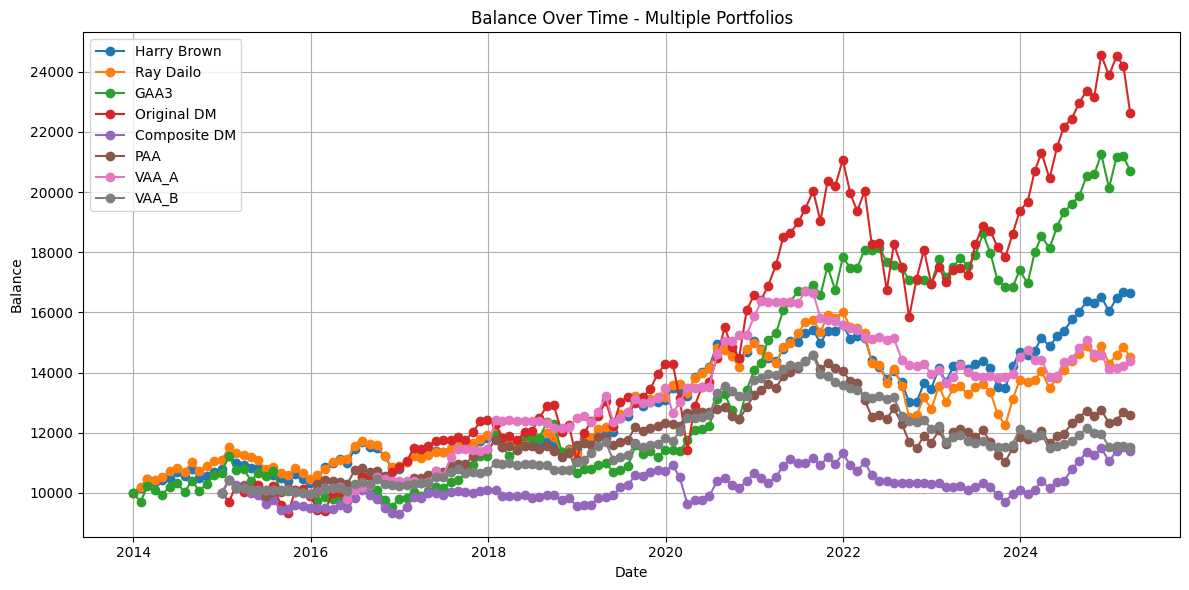

In [ ]:
from assetAllocation import AssetAllocation
import pandas as pd
import matplotlib.pyplot as plt

def plot_balance_over_time(df):
    """
    DataFrame의 'Date'를 X축, 'Balance'를 Y축으로 해서 라인 차트를 그립니다.
    
    Parameters:
        df (pd.DataFrame): 'Date'와 'Balance' 컬럼이 포함된 DataFrame
    """
    # 날짜 정렬 및 변환
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    
    # Balance 컬럼이 있는지 확인
    if 'Balance' not in df.columns:
        raise ValueError("'Balance' 컬럼이 DataFrame에 없습니다.")
    
    # 차트 그리기
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Balance'], marker='o', linestyle='-')
    plt.title('Balance Over Time')
    plt.xlabel('Date')
    plt.ylabel('Balance')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_multiple_balances_over_time(df_list, labels=None):
    """
    여러 개의 DataFrame을 한 그래프에 Balance Over Time으로 시각화합니다.
    
    Parameters:
        df_list (list of pd.DataFrame): 'Date'와 'Balance' 컬럼이 포함된 DataFrame들의 리스트
        labels (list of str): 각 데이터프레임에 대한 라벨 (범례용). None이면 숫자 인덱스 사용
    """
    plt.figure(figsize=(12, 6))

    for i, df in enumerate(df_list):
        df = df.copy()
        df['Date'] = pd.to_datetime(df['Date'])
        df.sort_values('Date', inplace=True)

        label = labels[i] if labels and i < len(labels) else f"Portfolio {i+1}"
        plt.plot(df['Date'], df['Balance'], marker='o', linestyle='-', label=label)

    plt.title('Balance Over Time - Multiple Portfolios')
    plt.xlabel('Date')
    plt.ylabel('Balance')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 해리브라운의 영구포트폴리오
def harry_browne_permanent_portfolio():
    df = AssetAllocation.get_stock_data_with_ma(symbols=['VTI','TLT','BIL','GLD'], start_date='2013-12-01', end_date='2025-03-31', mas=[10], type='ma_month')
    df = AssetAllocation.filter_close_last_month(df)
    df = AssetAllocation.strategy_evenly(df, ratios=[25,25,25,25], interval=12)
    # plot_balance_over_time(df)
    return df
    df = AssetAllocation.get_performance(df)
    display(df)

# 레이달리오 올시즌 포트폴리오
def ray_dalio_all_seasons():
    df = AssetAllocation.get_stock_data_with_ma(symbols=['VTI','TLT','IEF','GSG','GLD'], start_date='2013-12-01', end_date='2025-03-31', mas=[10], type='ma_month')
    df = AssetAllocation.filter_close_last_month(df)
    df = AssetAllocation.strategy_evenly(df, ratios=[30,40,15,7.5, 7.5], interval=12)
    # plot_balance_over_time(df)
    return df
    df = AssetAllocation.get_performance(df)
    display(df)


# 공격형 TAA전략
def gtaa3():
    # symbols = ['SPY','IWD','IWM', 'IWN','MTUM','EFA','TLT','IEF','LQD','DBC','VNQ','BWX','GLD']
    symbols = ['SPY','IWM','MTUM','EFA','TLT','IEF','LQD','DBC','VNQ','GLD']
    start_date = '2012-12-01'
    df = AssetAllocation.get_stock_data_with_ma(symbols=symbols, start_date=start_date, end_date='2025-03-31', mas=[10], type='ma_month')
    df = AssetAllocation.filter_close_last_month(df)
    df = AssetAllocation.strategy_taa(df, 3, [1,3,6,12])
    return df
    # plot_balance_over_time(df)
    df = AssetAllocation.get_performance(df)
    display(df)


def original_dual_momentum():
    symbols = ['SPY','EFA','AGG','BIL']
    compare_symbols = ['SPY','EFA']

    df = AssetAllocation.get_stock_data_with_ma(symbols=symbols, start_date='2013-12-01', end_date='2025-03-31', mas=[10], type='ma_month')
    df = AssetAllocation.filter_close_last_month(df)
    df = AssetAllocation.strategy_original_dual_momentum(df, compare_symbols)
    return df
    df = AssetAllocation.get_performance(df)
    display(df)


def composite_dual_momentum():
    symbols = ['SPY','EFA','LQD','HYG', 'VNQ', 'REM','TLT','GLD', 'BIL']
    df = AssetAllocation.get_stock_data_with_ma(symbols=symbols, start_date='2013-12-01', end_date='2025-03-31', mas=[10], type='ma_month')
    df = AssetAllocation.filter_close_last_month(df)
    df = AssetAllocation.strategy_composite_dual_momentum(df)
    return df
    df = AssetAllocation.get_performance(df)
    display(df)


def paa():
    symbols = ['SPY','QQQ','IWM','VGK','EWJ','EEM','VNQ','GLD','DBC','HYG','LQD','TLT'] + ['IEF']
    df = AssetAllocation.get_stock_data_with_ma(symbols=symbols, start_date='2013-12-01', end_date='2025-03-31', mas=[10], type='ma_month')
    df = AssetAllocation.filter_close_last_month(df)
    df = AssetAllocation.strategy_paa(df)
    return df
    df = AssetAllocation.get_performance(df)
    display(df)


def vaa_aggressive():
    symbols = ['SPY', 'EFA', 'EEM', 'AGG'] + ['LQD', 'IEF', 'SHY']
    df = AssetAllocation.get_stock_data_with_ma(symbols=symbols, start_date='2013-12-01', end_date='2025-03-31', mas=[10], type='ma_month')
    df = AssetAllocation.filter_close_last_month(df)
    df = AssetAllocation.strategy_vaa_aggressive(df)
    return df
    df = AssetAllocation.get_performance(df)
    display(df)


def vaa_balance():
    symbols = ['SPY', 'QQQ', 'IWM', 'VGK', 'EWJ', 'EEM', 'VNQ', 'GLD', 'DBC', 'HYG', 'LQD', 'TLT'] + ['LQD', 'IEF', 'SHY']
    df = AssetAllocation.get_stock_data_with_ma(symbols=symbols, start_date='2013-12-01', end_date='2025-03-31', mas=[10], type='ma_month')
    df = AssetAllocation.filter_close_last_month(df)
    df = AssetAllocation.strategy_vaa_balance(df)
    return df
    df = AssetAllocation.get_performance(df)
    display(df)


def daa():
    symbols = ['SPY', 'QQQ', 'IWM', 'VGK', 'EWJ', 'EEM', 'VNQ', 'GLD', 'DBC', 'HYG', 'LQD', 'TLT'] + ['LQD', 'IEF', 'SHY'] + ['VWO','BND']
    df = AssetAllocation.get_stock_data_with_ma(symbols=symbols, start_date='2013-12-01', end_date='2025-03-31', mas=[10], type='ma_month')
    df = AssetAllocation.filter_close_last_month(df)
    df = AssetAllocation.stragey_daa(df)
    return df
    df = AssetAllocation.get_performance(df)
    display(df)


def show_plot_portfolio():
    plot_multiple_balances_over_time([
        harry_browne_permanent_portfolio(),
        ray_dalio_all_seasons(),
        gtaa3(),
        original_dual_momentum(),
        composite_dual_momentum(),
        paa(),
        vaa_aggressive(),
        vaa_balance(),
        daa(),
    ],['Harry Brown','Ray Dailo','GAA3', 'Original DM', 'Composite DM', 'PAA','VAA_A', 'VAA_B', 'DAA'])